In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import ttest_ind as ttest_ind

The Edison Electric Institute has published figures on the number of kilowatt hoursused annually by various home appliances. It is claimed that a vacuum cleaner uses
an average of 46 kilowatt hours per year. If a random sample of 12 homes included in a planned study indicates that vacuum cleaners use an average of 42 kilowatt
hours per year with a standard deviation of 11.9 kilowatt hours, 
does this suggestat the 0.05 level of significance that vacuum cleaners use, on average, less than 46
kilowatt hours annually? Assume the population of kilowatt hours to be normal.

In [3]:
# Mean = 46, n=12, Sigma = 11.9
# HO : Mu =46
# H1 : Mu < 46
# Data Mu = 46, Xbar = 42, n=12, Sigma = 11.9
tcalc= (42-46)/(11.9/np.sqrt(12))
tcalc

-1.1644039042479846

In [4]:
# Area = stats.t.cdf(tcalc,11)
pvalue =stats.t.cdf(abs(tcalc),11)
pvalue

0.8655535872410081

In [3]:
# The grades in a statistics course for a particular semester were as follows 

# Grades         A  B  C  D  F
#               14 18 32 20 16
       
#Test the hypothesis, at the 0.05 level of significance, that the distribution of grades is uniform(equal probability)

In [4]:
observed_Grades = [14,18,32,20,16]
Expected_grades=np.array([1/5,1/5,1/5,1/5,1/5])*100 
stats.chisquare(f_exp=Expected_grades,f_obs=observed_Grades)

Power_divergenceResult(statistic=10.0, pvalue=0.04042768199451279)

The solar energy consumed (in trillion BTU) in the U.S. by year from 1989 to 2004 (source: U.S. Department of
Energy Web site, http://www.eia.doe.gov/emeu) is shown in the  below. 
Check the assumption of normality in the population. Construct a 95% confidence interval for the mean solar energy consumed. Suppose 

Solar energy =[55.291,59.718,62.688,63.886,66.458,68.548,69.857,70.833,70.237,69.787,68.793,66.388]

In [5]:
Solar_energy =[55.291,59.718,62.688,63.886,66.458,68.548,69.857,70.833,70.237,69.787,68.793,66.388]
stats.shapiro(Solar_energy)

ShapiroResult(statistic=0.8728018999099731, pvalue=0.07093048095703125)

In [6]:
# Since p value is more than .05 we can assume that data follows normality 
#Confidence interval can be constructed based on t statistics 
Xbar=np.mean(Solar_energy)
n=len(Solar_energy)
s = np.std(Solar_energy,ddof=1)
CI = stats.t.interval(alpha=0.95,loc=Xbar,scale= s/(n**0.5),df=n-1) 
CI

(62.98270888031746, 69.09795778634921)

In [7]:
# Consider the following data data_set.csv.

Frame the hypothesis ,calculate the test statistic and p_value , interpret the results for the following tasks with 95% Confidence level :¶
i. The shop keeper claims that the average of the item outlet sales is not less than $2280.Validate if his claim is true.(4 marks)

ii. IS the mean for sales from regular and low fat the same? (4 marks)

iii.Is there any relation between Outlet_Location_Type and Outlet_Type? (4 marks)

iv.Is there any relation between Item_Weight and Item_Outlet_Sales? (4 marks)

v. Is there any relation between Outlet_Size and Item_Outlet_Sales? (4 marks)

Note: Assume all continuous columns are normally distributed and have equal variance.

In [6]:
data= pd.read_csv('data_set2.csv')

In [7]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
4,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
4646,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
4647,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
4648,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
#The shop keeper claims that the average of the item outlet sales is not less than $2280.
#Validate if his claim is true
#Ho : Mu =2280
# h1 Mu > 2280

In [9]:
t_stat, p_val = stats.ttest_1samp(a = data["Item_Outlet_Sales"], popmean = 2280,alternative='greater')
t_stat
p_val

0.6414922422772751

In [10]:
# Since p value is greater than alpha fail to reject null

In [11]:
data["Item_Outlet_Sales"].count()

4650

In [12]:
Area = stats.t.cdf(t_stat,4649)

In [13]:
1-Area 

0.6414922422772751

In [14]:
# Is there any relation between Item_Fat_Content and Item_Outlet_Sales?
# Ho Mu_Itemregular = mulowfat
#H1 Mu_Itemregular not equal mulowfat

In [15]:
low_fat_sale = data[data['Item_Fat_Content']=='Low Fat']['Item_Outlet_Sales']
reg_sale = data[data['Item_Fat_Content']=='Regular']['Item_Outlet_Sales']

In [16]:
stats.ttest_ind(low_fat_sale,reg_sale)

Ttest_indResult(statistic=-0.6031979717004137, pvalue=0.5464064285474939)

In [17]:
#Since p is greater than .05 there is no difference

In [18]:
# Is there any relation between Outlet_Location_Type and Outlet_Type? 

In [19]:
# Ho :There is no relation
# Ha : There is a relation

In [21]:
obs = pd.crosstab(data['Outlet_Location_Type'],data['Outlet_Type'])
obs

Outlet_Type,Supermarket Type1,Supermarket Type2
Outlet_Location_Type,,
Tier 1,1860,0
Tier 2,930,0
Tier 3,932,928


In [66]:
stats.chi2_contingency(obs)

(1739.0650188070927,
 0.0,
 2,
 array([[1488.8,  371.2],
        [ 744.4,  185.6],
        [1488.8,  371.2]]))

In [67]:
# Sicne p value is less than .05 Reject the null hence there is a relation 

In [68]:
# Is there any relation between Item_Weight and Item_Outlet_Sales? (4 marks)

C:\Users\Vivekanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

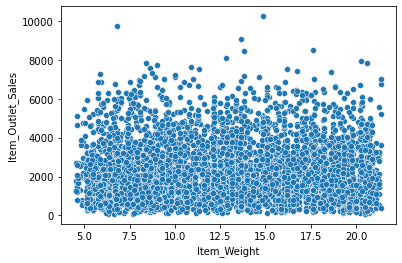

In [22]:
sns.scatterplot(data['Item_Weight'],data['Item_Outlet_Sales'])

In [69]:
stats.pearsonr(data['Item_Weight'],data['Item_Outlet_Sales'])

(0.010971826651563642, 0.45446004213843155)

In [70]:
# Sicne p value is greater than .05 hence fail to reject null whcih implies there is no relation

In [71]:
# Is there any relation between Outlet_Size and Item_Outlet_Sales? (4 marks)

In [ ]:
# Ho :Mu small sales= medium sales= high sales
# Ha : any one different 

In [74]:
small_sale = data[data['Outlet_Size']=='Small']['Item_Outlet_Sales']
med_sale = data[data['Outlet_Size']=='Medium']['Item_Outlet_Sales']
high_sale = data[data['Outlet_Size']=='High']['Item_Outlet_Sales']

In [75]:
stats.f_oneway(small_sale,med_sale,high_sale)

F_onewayResult(statistic=7.391908481135086, pvalue=0.0006234916597581883)

In [ ]:
# since p value is less than .05 reject null hence there is a significant difference therefore there is a relation